In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install --upgrade numpy

# Loading the Dataset

In [2]:
hotel_df = pd.read_csv('hotel_bookings_csv.csv')

# Exploratory Data Analysis and Data Cleaning

In [ ]:
hotel_df.head()

In [4]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,No Deposit,143.0,NaN,0,Transient,89.75,0,0,Check-Out,10/09/2017
119386,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,No Deposit,250.0,NaN,0,Transient-Party,202.27,0,1,Check-Out,10/09/2017
119387,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,No Deposit,250.0,NaN,0,Transient,153.57,0,3,Check-Out,12/09/2017
119388,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,No Deposit,40.0,NaN,0,Contract,112.80,0,1,Check-Out,14/09/2017
119389,Resort Hotel,0,161,2017,August,35,31,4,10,2,...,No Deposit,69.0,NaN,0,Transient,99.06,0,0,Check-Out,14/09/2017


In [ ]:
hotel_df.shape

In [5]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel_df.reservation_status_date

0         17/10/2014
1         17/10/2014
2         17/10/2014
3         17/10/2014
4         17/10/2014
             ...    
119385    10/09/2017
119386    10/09/2017
119387    12/09/2017
119388    14/09/2017
119389    14/09/2017
Name: reservation_status_date, Length: 119390, dtype: object

In [ ]:
hotel_df['reservation_status_date'].isnull().sum()

In [10]:
hotel_df.reservation_status_date = pd.to_datetime(hotel_df['reservation_status_date'])

In [11]:
hotel_df.reservation_status_date

0        2014-10-17
1        2014-10-17
2        2014-10-17
3        2014-10-17
4        2014-10-17
            ...    
119385   2017-09-10
119386   2017-09-10
119387   2017-09-12
119388   2017-09-14
119389   2017-09-14
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [ ]:
hotel_df.reservation_status_date.info()

In [12]:
hotel_df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


# Filtering the dataframe for unique elements

In [17]:
for col in hotel_df.describe(include=object):
    print(col)
    print(hotel_df[col].unique())
    print("_"*70)

hotel
['City Hotel' 'Resort Hotel']
______________________________________________________________________
arrival_date_month
['July' 'August' 'September' 'December' 'October' 'November' 'January'
 'May' 'April' 'March' 'June' 'February']
______________________________________________________________________
meal
['BB' 'HB' 'FB' 'SC' 'Undefined']
______________________________________________________________________
country
['PRT' 'GBR' 'BEL' 'DEU' 'ESP' 'IRL' nan 'ITA' 'FRA' 'ARG' 'USA' 'POL'
 'ROU' 'BRA' 'NOR' 'GRC' 'CN' 'CHE' 'NLD' 'RUS' 'AUS' 'SWE' 'EST' 'CZE'
 'OMN' 'FIN' 'AUT' 'DNK' 'NZL' 'HUN' 'MOZ' 'BWA' 'ISR' 'LUX' 'IDN' 'SVN'
 'ALB' 'CHN' 'MAR' 'HRV' 'AGO' 'BGR' 'IND' 'DZA' 'MEX' 'COL' 'TUN' 'KAZ'
 'IRN' 'LVA' 'STP' 'UKR' 'VEN' 'TUR' 'SMR' 'TWN' 'KOR' 'BLR' 'JPN' 'PRI'
 'SRB' 'AZE' 'LBN' 'CRI' 'THA' 'CHL' 'LTU' 'CPV' 'SVK' 'EGY' 'CMR' 'LIE'
 'MYS' 'SAU' 'ZAF' 'MMR' 'DOM' 'MKD' 'IRQ' 'SGP' 'CYM' 'ZMB' 'ZWE' 'SEN'
 'PAN' 'NGA' 'GIB' 'KNA' 'GEO' 'PER' 'JOR' 'KWT' 'ARM' 'LKA' 'TM

In [18]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [19]:
hotel_df.drop(['agent', 'company'], axis = 1, inplace = True)

In [20]:
hotel_df.dropna(inplace = True)

In [21]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [23]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


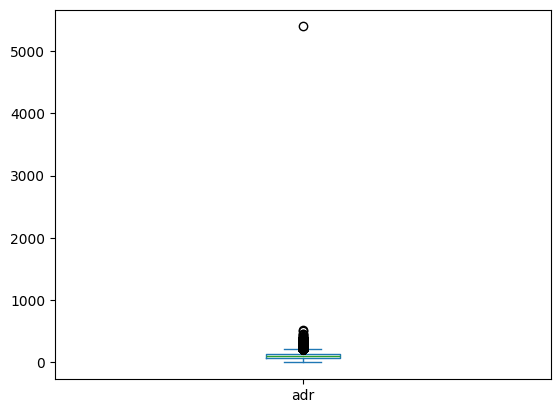

In [38]:
hotel_df.adr.plot(kind = 'box');

In [71]:
mean_value = hotel_df['adr'].mean()
std_value = hotel_df['adr'].std()

threshold_value = 15*std_value

In [72]:
std_value

48.091198650150375

In [73]:
mean_value-threshold_value

-619.4092967745523

In [74]:
mean_value + threshold_value

823.326662729959

In [75]:
threshold_value

721.3679797522557

In [76]:
hotel_df_filter_adr = hotel_df[(hotel_df['adr'] >= 0) & (hotel_df['adr'] <= mean_value + threshold_value)]

In [77]:
hotel_df_filter_adr.adr

0          62.80
1          62.80
2          62.80
3          62.80
4          62.80
           ...  
119385     89.75
119386    202.27
119387    153.57
119388    112.80
119389     99.06
Name: adr, Length: 118896, dtype: float64

In [78]:
hotel_df.adr.min()

-6.38

In [49]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [80]:
hotel_df = hotel_df_filter_adr

# removing the outlier from dataset column 'adr'

##### outlier is max value of adr column i.e. 5400

In [50]:
hotel_df = hotel_df[hotel_df['adr']<5000]

In [81]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896
mean,0.371350,104.311255,2016.157650,27.166818,15.800893,0.928879,2.502128,1.858389,0.104209,0.007948,0.032003,0.087143,0.131619,0.221160,2.330793,101.959594,0.061886,0.571693,2016-07-30 07:37:05.837706752
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903696,0.707461,13.589932,8.780302,0.996181,1.900152,0.578580,0.399175,0.097381,0.176008,0.845876,1.484674,0.652766,17.630598,48.090374,0.244174,0.792681,NaN


# Data Analysis and Visualisation

In [83]:
cancelled_perc = hotel_df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

# 0 = Not cancelled, 1 = Cancelled

is_canceled
0    0.62865
1    0.37135
Name: proportion, dtype: float64


### Visualising the Canceled and Not Canceled values

In [91]:
hotel_df.is_canceled.unique()

array([1, 0], dtype=int64)

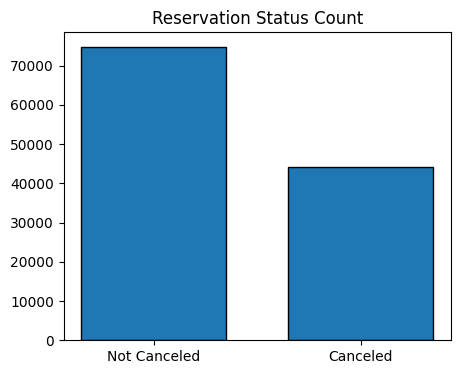

In [92]:
plt.figure(figsize = (5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled', 'Canceled'],hotel_df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show();

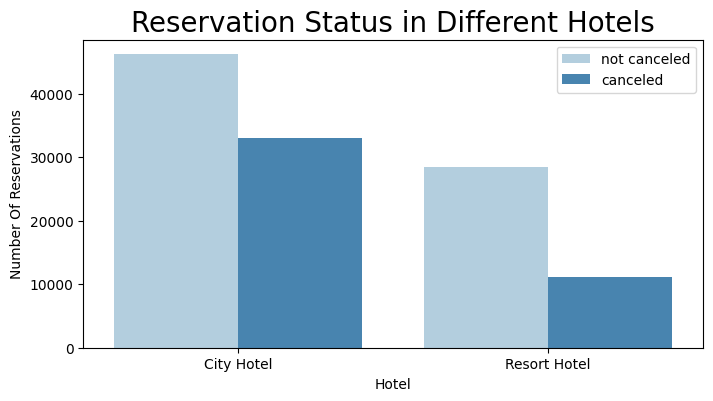

In [98]:
plt.figure(figsize = (8,4)) #used to set the size of chart
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = hotel_df, palette = 'Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor = (1,1))
plt.title('Reservation Status in Different Hotels', size=20)
plt.xlabel('Hotel')
plt.ylabel('Number Of Reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

In [105]:
resort_hotel = hotel_df[hotel_df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.720242
1    0.279758
Name: proportion, dtype: float64

In [107]:
city_hotel = hotel_df[hotel_df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

###### *Let's Check if price have any effects on reservation canclletions*

In [108]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

### Visualization for average daily rate in both city and resort hotels

In [110]:
resort_hotel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


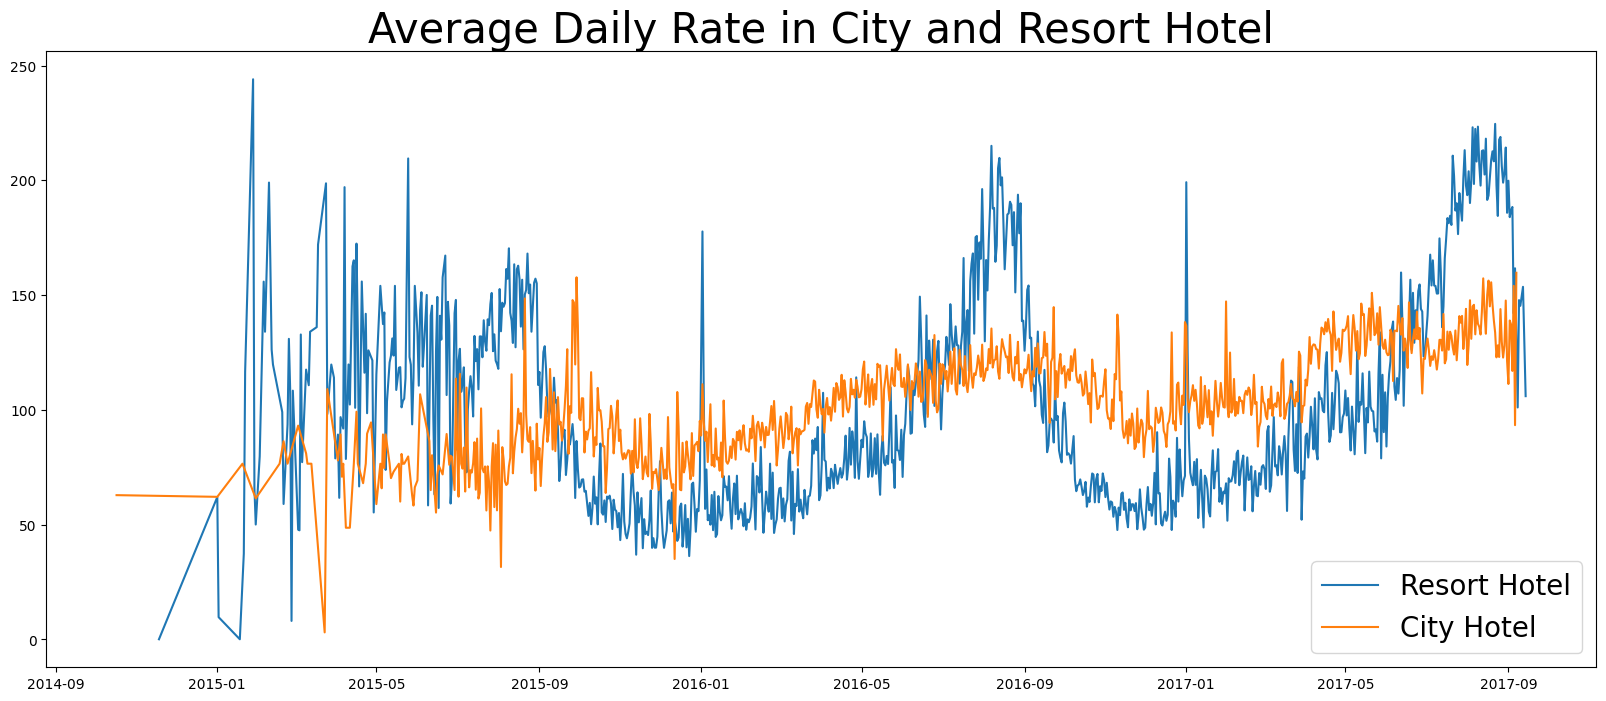

In [111]:
plt.figure(figsize = (20, 8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

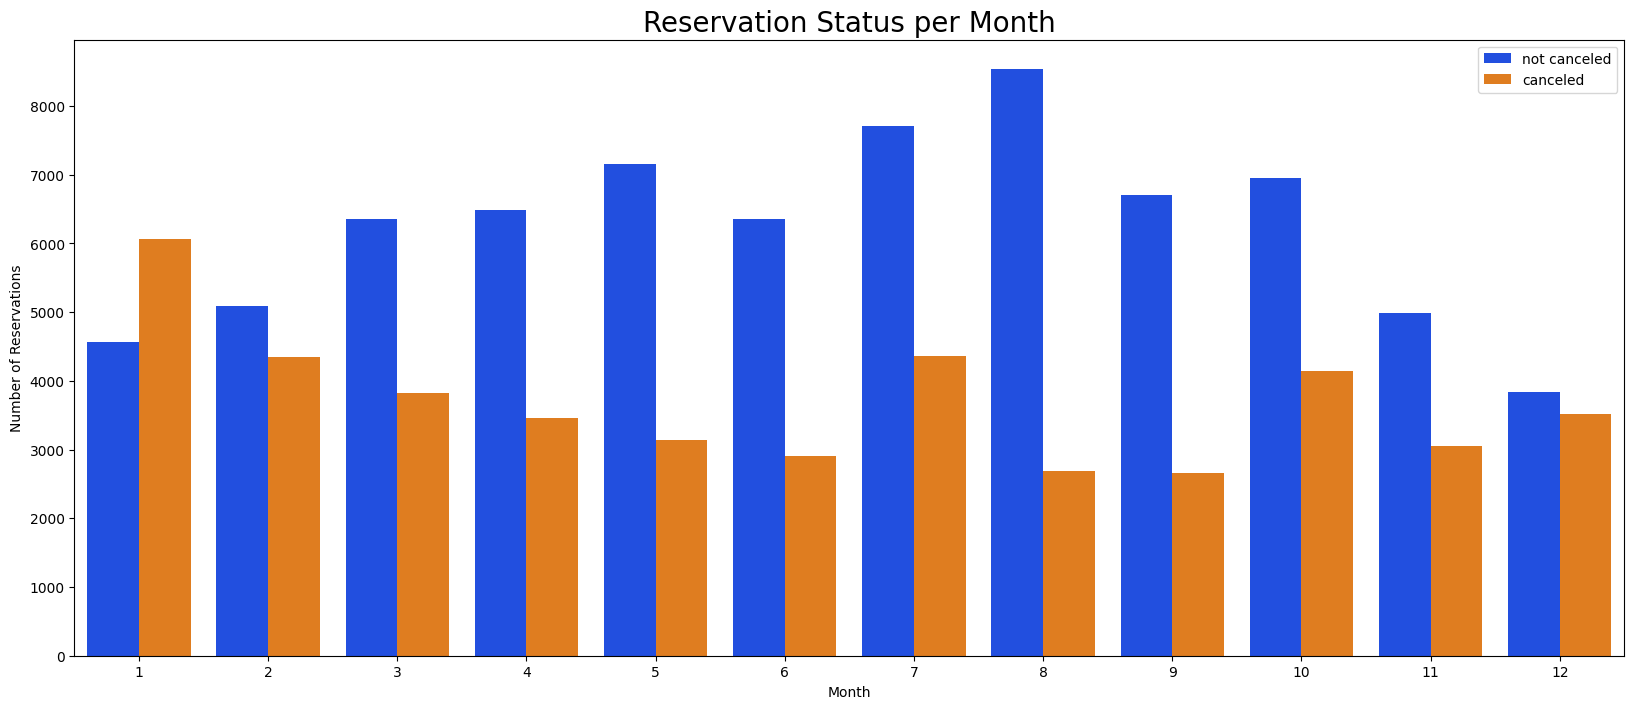

In [114]:
hotel_df['month'] = hotel_df['reservation_status_date'].dt.month
plt.figure(figsize = (20,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = hotel_df, palette = 'bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor = (1,1))
plt.title('Reservation Status per Month', size = 20)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(['not canceled','canceled'])
plt.show()

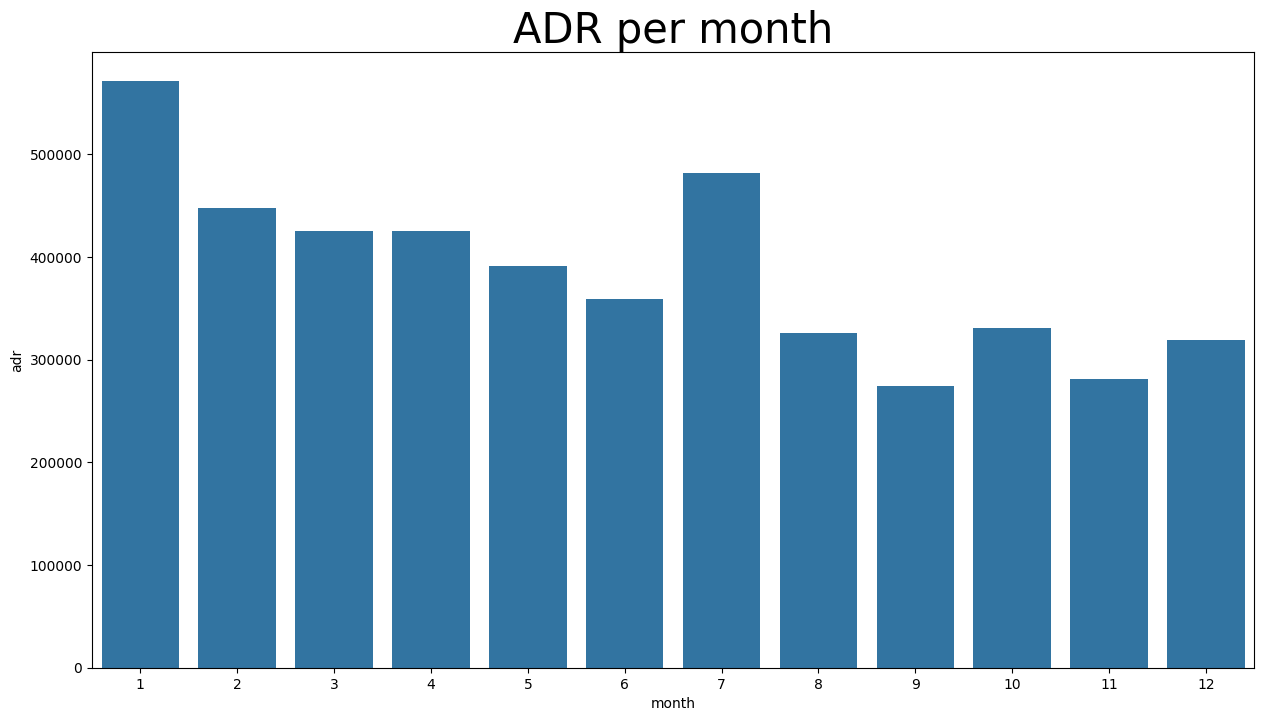

In [117]:
plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize = 30)
sns.barplot(x='month', y='adr', data = hotel_df[hotel_df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

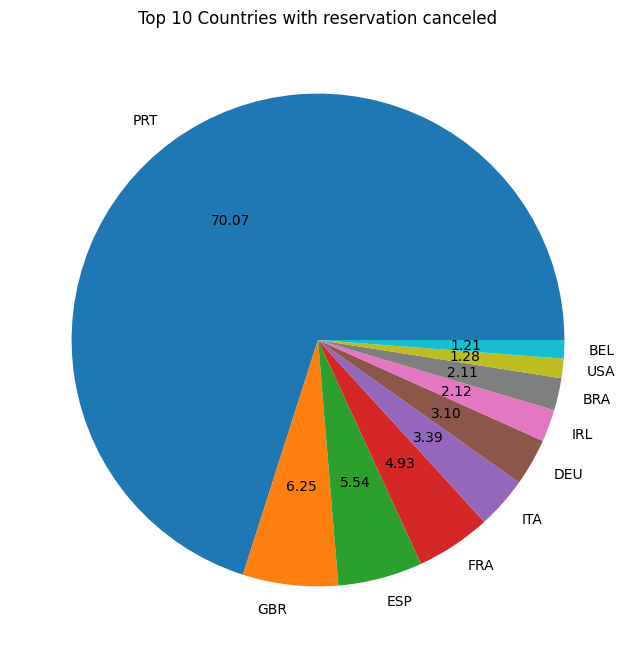

In [120]:
cancelled_data = hotel_df[hotel_df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 Countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [123]:
hotel_df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19805
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [125]:
hotel_df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.474381
Offline TA/TO    0.203194
Groups           0.166574
Direct           0.104697
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [127]:
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

#### Checking whether the ADR of cancelled reservation is high or non-cancelled 

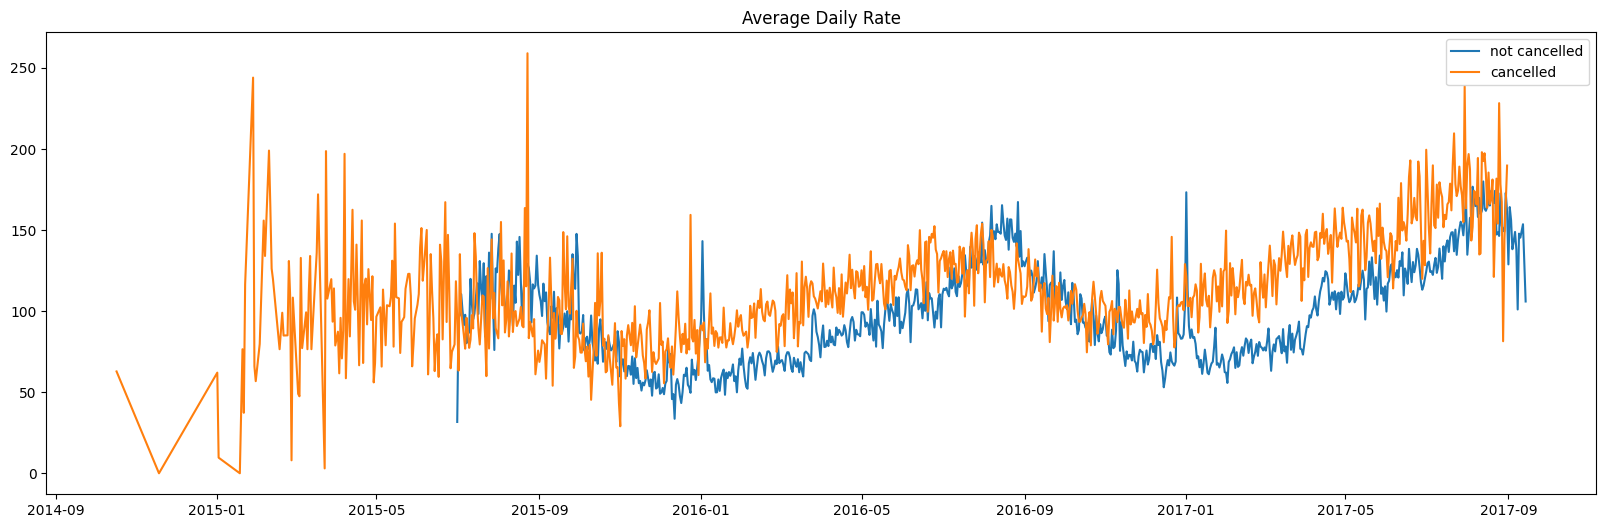

In [129]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = hotel_df[hotel_df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend();

In [130]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

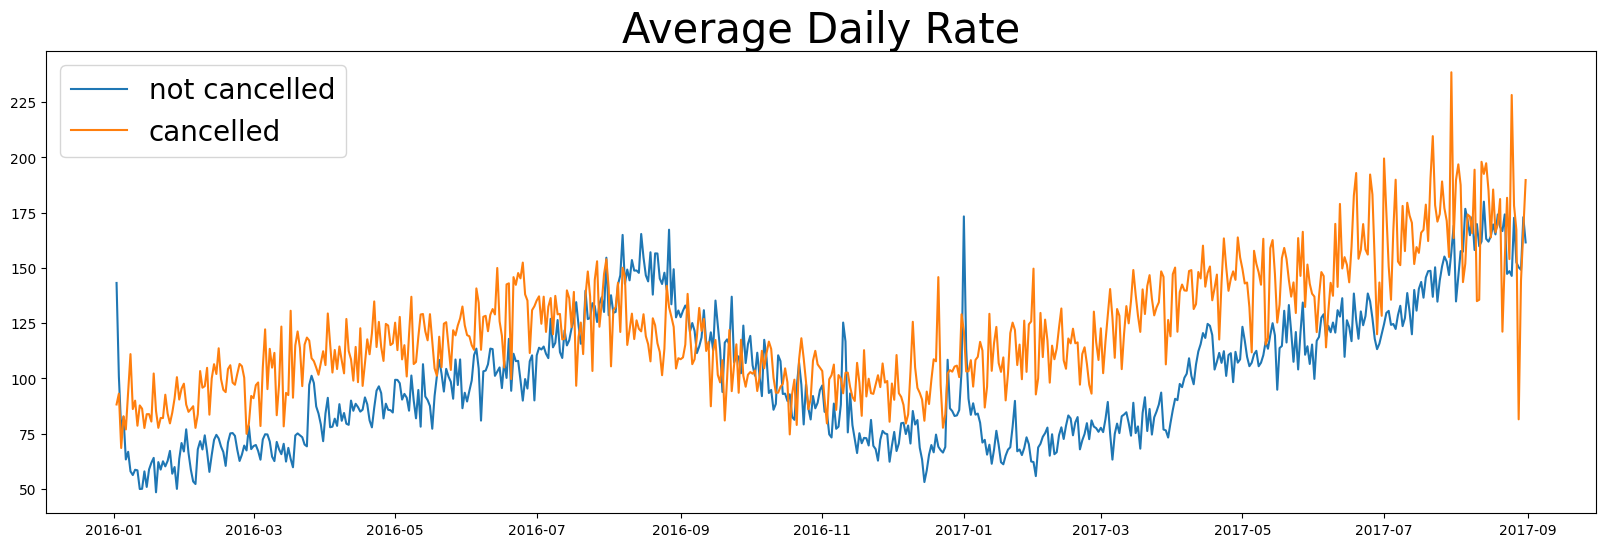

In [131]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()